In [30]:
# import libraries
import pandas as pd
import glob

In [31]:
# since all files are named in a way that includes the year
file_paths = glob.glob("../data/pop_density_data/pop_density_kenya/ken_pd_*_1km_ASCII_XYZ.csv")

In [3]:
import re  # Import regex for pattern matching


pop_density_df = []

for file_path in file_paths:
    # Extract the year using regular expressions
    match = re.search(r'ken_pd_(\d{4})_1km_ASCII_XYZ\.csv', file_path)
    if match:
        year = match.group(1)  # Extract the year from the filename
        
        # Load the file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Rename the population density column to the year
        df = df.rename(columns={'Z': year})
        
        # Append to the list
        pop_density_df.append(df[['X', 'Y', year]])
    else:
        print(f"Year not found in filename: {file_path}")

In [4]:
# Merge all DataFrames on 'x' and 'y' columns to have years as separate columns
merged_data = pop_density_df[0]
for df in pop_density_df[1:]:
    merged_data = merged_data.merge(df, on=['X', 'Y'], how='outer')

In [5]:
merged_data.head()

,X,Y,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,33.911250,0.112084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.919583,0.087084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.919583,0.112084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33.919583,0.120417,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33.927917,0.053750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Save the final merged file with years as columns
merged_data.to_csv("../data/pop_density_data/merged_population_density_with_years_as_columns.csv", index=False)

### Looking into the merged population data csv

#### Load the data

In [7]:
pop_df = pd.read_csv("../data/pop_density_data/merged_population_density_with_years_as_columns.csv")

#### Inspect the data

In [8]:
pop_df.head()

,X,Y,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,33.911250,0.112084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.919583,0.087084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.919583,0.112084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33.919583,0.120417,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33.927917,0.053750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pop_df.info

<bound method DataFrame.info of                 X         Y        2000        2001        2002        2003  \
0       33.911250  0.112084    0.000000         NaN         NaN         NaN   
1       33.919583  0.087084    0.000000         NaN         NaN         NaN   
2       33.919583  0.112084    0.000000         NaN         NaN         NaN   
3       33.919583  0.120417    0.000000         NaN         NaN         NaN   
4       33.927917  0.053750    0.000000         NaN         NaN         NaN   
...           ...       ...         ...         ...         ...         ...   
680380  41.869583  3.937084  397.773865  457.913635  530.126038  568.024841   
680381  41.869583  3.945417  359.506500  444.072296  449.517883  487.438477   
680382  41.869583  3.953750  216.237427  209.201828  189.976120  207.793716   
680383  41.877917  3.953750  177.267853  200.703415  186.920654  182.440414   
680384  41.877917  3.962084  122.937309  133.446503   93.444855   99.783760   

              2004 

In [11]:
pop_df.dtypes

X       float64
Y       float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
dtype: object

#### Handle Missing values

In [12]:
pop_df.isnull().sum()

X           0
Y           0
2000        0
2001      123
2002      123
2003      123
2004      123
2005      123
2006      123
2007      123
2008      123
2009      123
2010      123
2011      123
2012    15620
2013      123
2014      123
2015      123
2016      123
2017      123
2018      123
2019      123
2020      123
dtype: int64

In [13]:
pop_df.dropna(axis=0, inplace=True)  # Drop rows with missing values

In [14]:
pop_df.isnull().sum()

X       0
Y       0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
dtype: int64

In [15]:
pop_df.info

<bound method DataFrame.info of                 X         Y        2000        2001        2002        2003  \
23      33.936250 -0.454583   17.046934   22.636568   26.614384   28.408123   
34      33.944583 -0.904583    9.635188    3.794350    4.141058    5.912924   
35      33.944583 -0.896250    3.173546    1.286149    1.535622    2.170570   
37      33.944583 -0.879583    1.042675    0.569356    0.647230    0.939200   
39      33.944583 -0.471250   65.247803   94.353806   57.720203   54.907028   
...           ...       ...         ...         ...         ...         ...   
680380  41.869583  3.937084  397.773865  457.913635  530.126038  568.024841   
680381  41.869583  3.945417  359.506500  444.072296  449.517883  487.438477   
680382  41.869583  3.953750  216.237427  209.201828  189.976120  207.793716   
680383  41.877917  3.953750  177.267853  200.703415  186.920654  182.440414   
680384  41.877917  3.962084  122.937309  133.446503   93.444855   99.783760   

              2004 

In [16]:
pop_df.head()

,X,Y,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
23,33.936250,-0.454583,17.046934,22.636568,26.614384,28.408123,31.719957,36.113342,36.872929,35.567101,...,50.494335,61.512432,42.381313,40.083412,46.691521,47.579529,42.152298,45.960426,47.790588,49.386059
34,33.944583,-0.904583,9.635188,3.794350,4.141058,5.912924,5.367672,5.510269,5.218074,5.140971,...,5.545019,4.980308,6.438573,6.498434,5.696783,4.794905,6.254217,6.831475,7.460217,6.545098
35,33.944583,-0.896250,3.173546,1.286149,1.535622,2.170570,1.842766,1.968245,1.689632,1.723875,...,1.934170,1.517630,2.100452,2.316293,1.960472,1.567045,2.117588,2.534612,2.573840,2.359639
37,33.944583,-0.879583,1.042675,0.569356,0.647230,0.939200,0.756590,0.797442,0.738727,0.789873,...,0.927826,0.708459,0.912764,0.833606,0.826680,0.685874,0.853369,1.027039,1.050690,0.959618
39,33.944583,-0.471250,65.247803,94.353806,57.720203,54.907028,55.968464,65.358604,67.026329,69.025032,...,78.759415,77.409843,79.825775,73.332520,111.396530,72.769958,70.986237,72.327637,73.131233,76.401291


In [17]:
# Check for duplicates
pop_df.duplicated().sum()

0

### Handling Outliers

In [19]:
# Filter out invalid latitude and longitude entries
pop_df = pop_df[(pop_df['X'].between(-90, 90)) & (pop_df['Y'].between(-180, 180))]

In [20]:
# Using IQR to filter population density over the years
# Loop over population density columns to apply the IQR method
for column in pop_df.columns[2:]:  # the first 2 columns are longitude and latitude
    Q1 = pop_df[column].quantile(0.25)
    Q3 = pop_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    pop_df = pop_df[(pop_df[column] >= lower_bound) & (pop_df[column] <= upper_bound)]


In [21]:
# Examine correlations between numerical variables
pop_df.corr()

,X,Y,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
X,1.000000,-0.470361,-0.364419,-0.398848,-0.379379,-0.362974,-0.351131,-0.344196,-0.336359,-0.314886,...,-0.241004,-0.228535,-0.230802,-0.209572,-0.195755,-0.164260,-0.144813,-0.123696,-0.102454,-0.077681
Y,-0.470361,1.000000,0.061264,0.124881,0.122224,0.116265,0.127130,0.120606,0.126689,0.120083,...,0.121606,0.114325,0.109473,0.135145,0.123865,0.125946,0.125290,0.122846,0.120501,0.119160
2000,-0.364419,0.061264,1.000000,0.875864,0.872362,0.867768,0.834474,0.836834,0.841867,0.831736,...,0.783076,0.767095,0.801394,0.715723,0.745137,0.692452,0.692983,0.688337,0.681333,0.662050
2001,-0.398848,0.124881,0.875864,1.000000,0.967964,0.949615,0.935616,0.927828,0.925423,0.911808,...,0.862160,0.845219,0.839296,0.787450,0.792085,0.703398,0.698650,0.690473,0.679726,0.662134
2002,-0.379379,0.122224,0.872362,0.967964,1.000000,0.980193,0.967110,0.958105,0.954659,0.942998,...,0.894735,0.874901,0.866245,0.814959,0.820665,0.725133,0.721803,0.714861,0.705254,0.688326
2003,-0.362974,0.116265,0.867768,0.949615,0.980193,1.000000,0.985885,0.977503,0.972266,0.963129,...,0.916658,0.896471,0.884727,0.836406,0.842264,0.741223,0.739176,0.733609,0.724862,0.708829
2004,-0.351131,0.127130,0.834474,0.935616,0.967110,0.985885,1.000000,0.987298,0.979452,0.971526,...,0.930878,0.911863,0.890350,0.852622,0.852923,0.743095,0.741746,0.736756,0.728907,0.714490
2005,-0.344196,0.120606,0.836834,0.927828,0.958105,0.977503,0.987298,1.000000,0.989555,0.983149,...,0.946247,0.927062,0.904069,0.865187,0.866103,0.753545,0.753076,0.749190,0.742133,0.728721
2006,-0.336359,0.126689,0.841867,0.925423,0.954659,0.972266,0.979452,0.989555,1.000000,0.991414,...,0.958396,0.940063,0.919546,0.880335,0.882730,0.768328,0.769536,0.766573,0.760426,0.747720
2007,-0.314886,0.120083,0.831736,0.911808,0.942998,0.963129,0.971526,0.983149,0.991414,1.000000,...,0.967869,0.950641,0.926989,0.888485,0.891370,0.773703,0.776127,0.774436,0.769500,0.758130


### Data Visualization

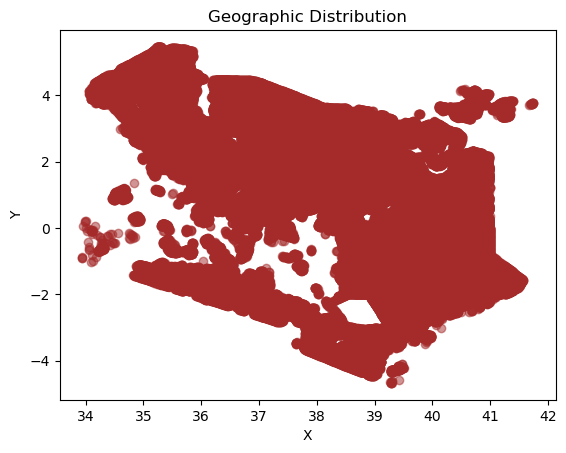

In [24]:
# Plots for Latitude and Longitude Data
import matplotlib.pyplot as plt

plt.scatter(pop_df['X'], pop_df['Y'], c='brown', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Geographic Distribution')
plt.show()


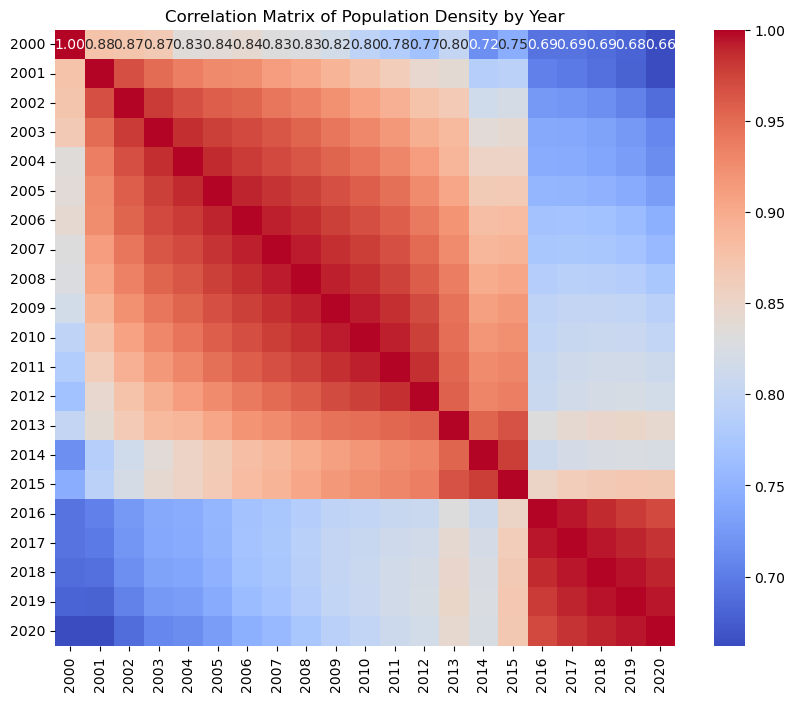

In [29]:
import seaborn as sns

# Select only the population density columns (skipping the first two columns)
density_data = pop_df.iloc[:, 2:]

# Calculate the correlation matrix
correlation_matrix = density_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Population Density by Year")
plt.show()

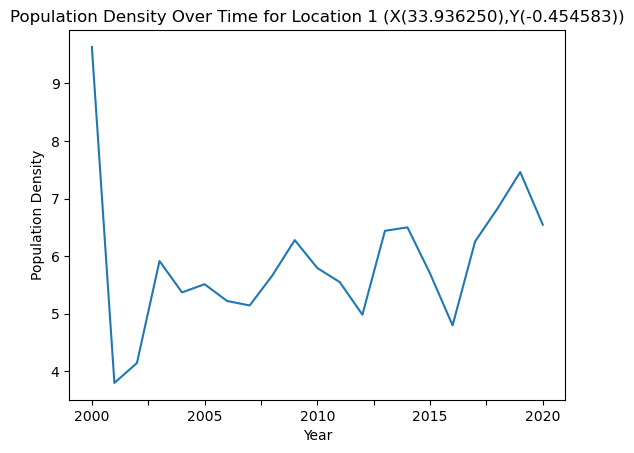

In [28]:
# Plot population density over time for the first location
pop_df.set_index(['X', 'Y']).iloc[0].plot()
plt.title('Population Density Over Time for Location 1 (X(33.936250),Y(-0.454583))')
plt.xlabel('Year')
plt.ylabel('Population Density')
plt.show()